## CLICKSTREAM DATA ANALYSIS

**ANIMESH JAIN**<br>
**EN18CS301035**

### Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset.

In [3]:
df=pd.read_csv("e-shop clothing 2008.csv",sep=';')

### Printing the first 10 lines of the dataset.

In [4]:
df.head(10)

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
5,2008,4,1,6,29,1,3,C56,6,1,2,57,1,4
6,2008,4,1,7,29,1,3,C57,5,1,2,33,2,4
7,2008,4,1,8,29,1,4,P67,9,5,1,38,1,4
8,2008,4,1,9,29,1,4,P82,6,4,2,48,1,5
9,2008,4,1,1,29,2,2,B31,9,5,1,57,1,2


### Description of the dataset


1. YEAR: The data is recorded only for certain months for the same year so the value of the YEAR column is the same in all the rows i.e., 2008.

2. MONTH: This variable contains the month number in which the product was bought on the platform. It has values ranging from 4(April) to 8(August). This is a categorical variable.

3. DAY: This variable has the day on which the product was bought by the customer. It ranges from 1 to 31 as for the number of days in a month. This is an ordinal variable.

4. ORDER: This variable contains the total number of clicks during one session of a user on the platform. It is numerical data. 

5. COUNTRY: Variable indicating the country of origin of the IP address with the following categories:
Australia, Austria, Belgium, British Virgin Islands, The Cayman Islands, Christmas Island, Croatia, Cyprus, Czech Republic, Denmark, Estonia, Unidentified, Faroe Islands, Finland, France, Germany,  Greece, Hungary, Iceland, India, Ireland, Italy, Latvia, Lithuania, Luxembourg, Mexico, Netherlands, Norway, Poland, Portugal, Romania, Russia, San Marino, Slovakia, Slovenia, Spain, Sweden, Switzerland, Ukraine, United Arab Emirates, United Kingdom, USA, biz (.biz) 44-com (.com), Int (.int) 46-net (.net), org (*.org).

6. SESSION ID: Variable indicating session-id (a short record). A session ID is a unique code assigned by a web server to a specific surfer for the duration of their visit (session) on the website. Session IDs are stored as cookies, form fields, or Uniform Resource Locators (URLs). Some web servers simply increment a static number to generate the session ID. However, most of the web servers use the algorithms that include more sophisticated techniques, such as tracking even the variables such as date and time any surfers visit on the website, along with other variables defined by the server administrator. Each time a web user clicks on a particular link of website, a new session ID is assigned. Closing and reopening the browser and revisiting the site can sometimes generate a new session ID.

7. PAGE 1 (MAIN CATEGORY): This variable is concerned with the main product category. It has four categories.
1-trousers
2-skirts
3-blouses
4-sale

8. PAGE 2 (CLOTHING MODEL): It contains information about the product code for each product. There are a total of 217 products in the dataset. All these products have a unique product id associated with the respected product.

9. COLOUR: It describes the color of the product.
1- beige
2- black
3- blue
4- brown
5- burgundy
6- gray
7- green
8- navy blue
9- of many colors
10-olive
11-pink
12-red
13-violet
14-white

10. LOCATION: On the web page of the website there are locations on which the picture of the product is displayed. This variable deals with the location of the picture on the page, the webpage has been divided into six parts:
1-top left
2-top in the middle
3-top right
4-bottom left
5-bottom in the middle
6-bottom right

11. MODEL PHOTOGRAPHY: Any product on a website has to have a visual description. This picture has a model wearing the product. This variable depicts the visual description of the with two categories:
1- Only face
2- Profile

12. PRICE: Price of product in US dollars.

13. PRICE 2: This is the variable informing about the price of a particular product being higher than the average price for the entire product category. 
1-yes
2-no

14. PAGE: A website contains several pages to display the information and products. This variable will indicate to which page the sold product belongs. This variable has values ranging from 1 to 5.


### Shape of the dataset

In [5]:
df.shape

(165474, 14)

### Information of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

### Description of the price variable

In [7]:
df['price'].describe()

count    165474.000000
mean         43.802507
std          12.548131
min          18.000000
25%          33.000000
50%          43.000000
75%          52.000000
max          82.000000
Name: price, dtype: float64

### Distribution of the price variable

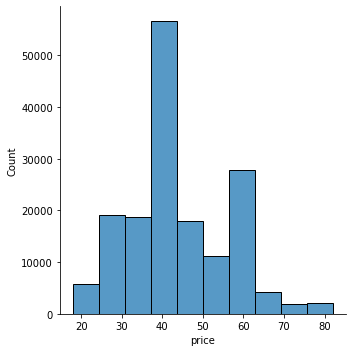

In [8]:
sns.displot(data=df,x='price',kind='hist',bins=10)

In [9]:
l=[]
for i in df['price']:
    if i<30:
        l.append('0')
    elif i>=30 and i<60:
        l.append('1')
    else:
        l.append('2')


In [12]:
print(len(l))
df['price_cat']=l

165474


### Distribution after categorization of the price variable

<AxesSubplot:xlabel='price_cat', ylabel='count'>

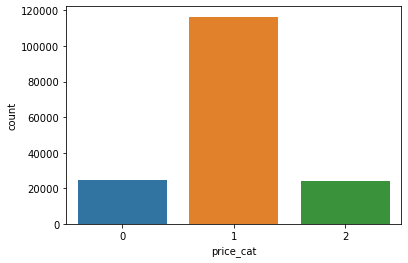

In [13]:
sns.countplot(df['price_cat'])

### Univariate analysis 

In [18]:
df['year'].value_counts()

2008    165474
Name: year, dtype: int64

In [23]:
df['month'].value_counts()

4    48199
5    35654
7    35231
6    32242
8    14148
Name: month, dtype: int64

we can see that at the starting of every month we have the highest number 

In [24]:
df['order'].describe()

count    165474.000000
mean          9.817476
std          13.478411
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max         195.000000
Name: order, dtype: float64

<AxesSubplot:xlabel='colour', ylabel='count'>

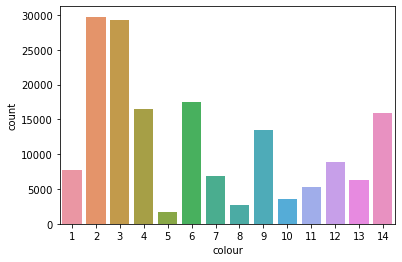

In [25]:
sns.countplot(df['colour'])

### Correlation of the variables

In [26]:
corr=df.corr()

<AxesSubplot:>

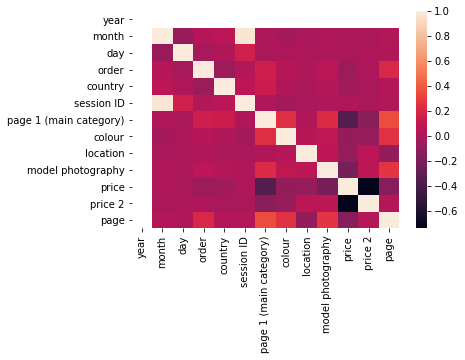

In [27]:
sns.heatmap(corr)

In [28]:
csdf = df[['month', 'day', 'page 1 (main category)', 'price', 'page']]
csdf = csdf.rename(columns={'month':'Month', 'day':'Day', 'page 1 (main category)':'Type',
                     'price':'Price', 'page':'Page'})
csdf.Type = csdf.Type.replace({1: 'Trousers', 2: 'Skirts', 3: 'Blouses', 4: 'Sale'})
csdf.Month = csdf.Month.replace({4: 'April', 5: 'May', 6: 'June', 7:'July', 8: 'August'})
csdf.head()

,Month,Day,Type,Price,Page
0,April,1,Trousers,28,1
1,April,1,Trousers,33,1
2,April,1,Skirts,52,1
3,April,1,Skirts,38,1
4,April,1,Skirts,52,1


### Sales by month

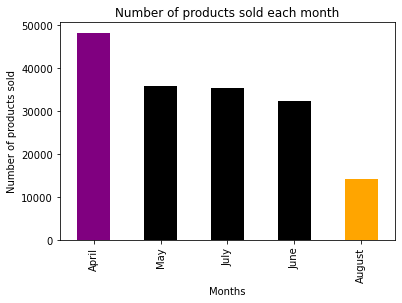

In [29]:
by_month=csdf.Month.value_counts()
by_month.plot(kind='bar',color=['purple','black','black','black','orange'])
plt.xlabel('Months')
plt.ylabel('Number of products sold')
plt.title('Number of products sold each month')
plt.show()

April has the highest number of sales, and August has the fewest; August, however, seems surprisingly low - could we have incomplete data for that month? Ultimately, it is probably worth checking each month, just to ensure a full range of dates, and to see the sales trends as they unfold throughout the month.

In [30]:
aug=csdf.loc[csdf['Month']=='August']
april=csdf.loc[csdf['Month']=='April']
may=csdf.loc[csdf['Month']=='June']
june=csdf.loc[csdf['Month']=='June']
july=csdf.loc[csdf['Month']=='July']

In [31]:
aug_day=aug['Day'].value_counts()
april_day=april['Day'].value_counts()
may_day=may['Day'].value_counts()
june_day=june['Day'].value_counts()
july_day=july['Day'].value_counts()

In [32]:
april=pd.DataFrame(april_day)
april.reset_index(inplace=True)
may=pd.DataFrame(may_day)
may.reset_index(inplace=True)
june=pd.DataFrame(june_day)
june.reset_index(inplace=True)
july=pd.DataFrame(july_day)
july.reset_index(inplace=True)
aug=pd.DataFrame(aug_day)
aug.reset_index(inplace=True)

### Sales per month in each month

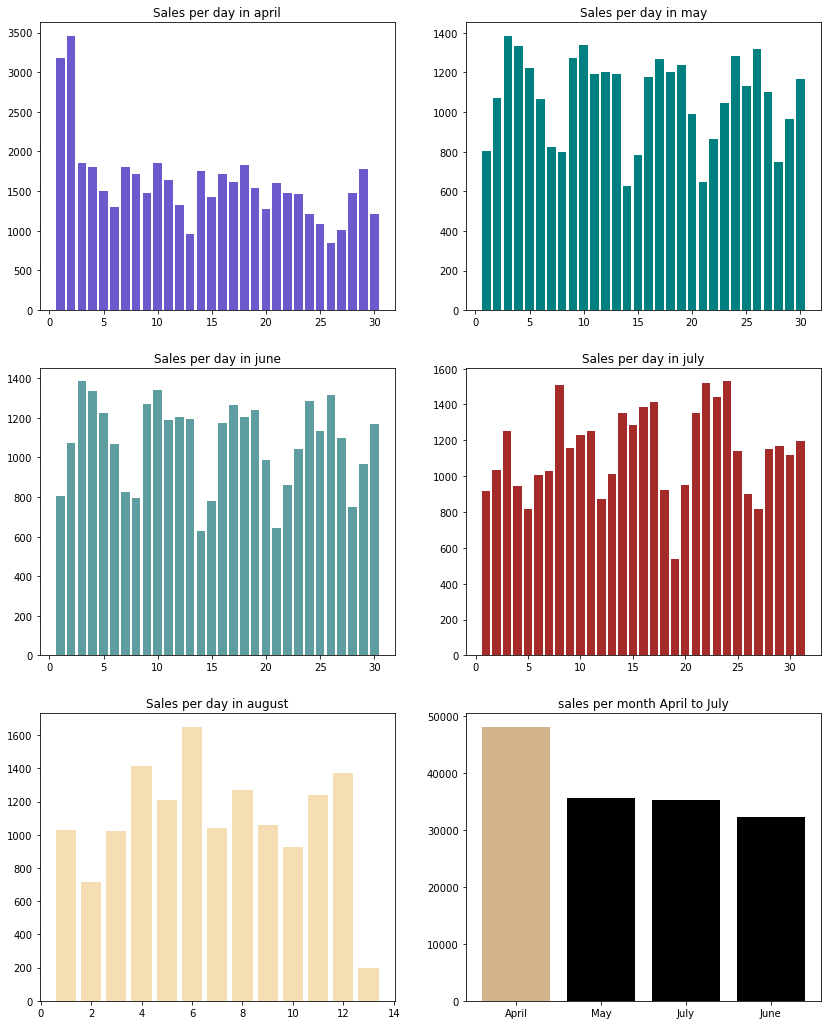

In [33]:
fig, axs = plt.subplots(nrows=3, ncols = 2, figsize=[14,18])
# sns.lineplot(x=april['index'],y=april['Day'])
axs[0,0].bar(april['index'],april['Day'],color='slateblue')
axs[0,0].set_title('Sales per day in april')
axs[0,1].bar(may['index'],may['Day'],color='teal')
axs[0,1].set_title('Sales per day in may')
axs[1,0].bar(june['index'],june['Day'],color='cadetblue')
axs[1,0].set_title('Sales per day in june')
axs[1,1].bar(july['index'],july['Day'],color='brown')
axs[1,1].set_title('Sales per day in july')
axs[2,0].bar(aug['index'],aug['Day'],color='wheat')
axs[2,0].set_title('Sales per day in august')
by_month_4=by_month['April':'June']
axs[2,1].bar(by_month_4.index,by_month_4.values,color=['tan','black','black','black'])
axs[2,1].set_title('sales per month April to July')
plt.show()

So, it looks like August is incomplete - only about half of the month has data accounted for. April may have either confounding data or incomplete data, as the first two days have so many more sales than any of the other days - maybe cumulative data from March leaked into April?

Interestingly, as for the overall data, it seems that sales peak towards the start of the month, and dwindle as the month goes on - however, the only month that follows that trend exactly is April, whereas the rest of the months seem to be relatively steady throughout

In [34]:
df_grp_mnth=csdf[['Month','Price']].groupby('Month').sum()

### Composition of the products sold each month 

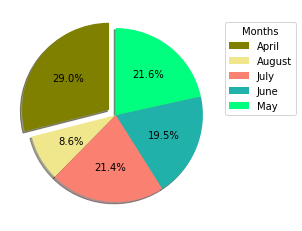

In [35]:
df_grp_mnth.head()
plt.pie(df_grp_mnth.Price,explode=[0.1,0,0,0,0],shadow=True, startangle=90, colors=['olive', 'khaki', 'salmon', 'lightseagreen', 'springgreen'],autopct='%1.1f%%')
plt.legend(df_grp_mnth.index,title='Months',loc=(1,.5))
plt.show()

In [36]:
df_grp_type_avg=csdf[['Type','Price']].groupby('Type').mean()
df_grp_type_avg


,Price
Type,
Blouses,40.291728
Sale,36.233799
Skirts,51.192434
Trousers,46.714889


### Average cost of cloting type

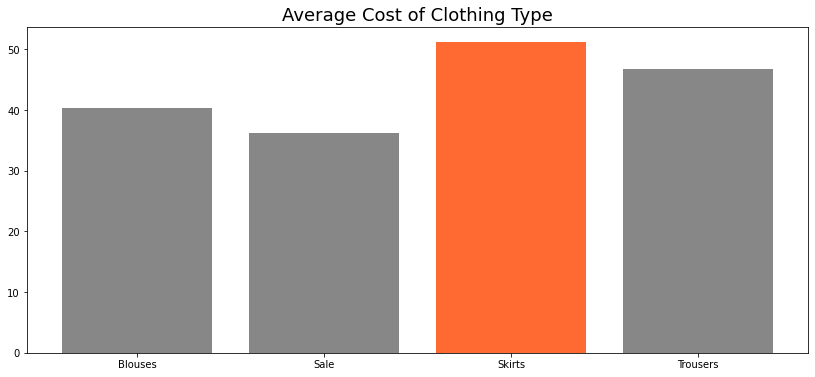

In [37]:
fig, ax = plt.subplots(figsize = [14,6])

ax.bar(df_grp_type_avg.index, df_grp_type_avg.Price, color = ['dimgrey', 'dimgrey', 'orangered', 'dimgrey'], alpha = .8)
ax.set_title('Average Cost of Clothing Type', fontsize=18)
plt.show()

In [38]:
total_types = csdf.Type.value_counts()
df_grp_type_sum=csdf[['Type','Price']].groupby('Type').sum()

df_type = df_grp_type_sum
df_type['Total'] = total_types
df_type['Average'] = df_grp_type_avg['Price']
df_type = df_type.rename(columns={'Price' : 'Value'})
df_type

,Value,Total,Average
Type,,,
Blouses,1554334,38577,40.291728
Sale,1403951,38747,36.233799
Skirts,1966199,38408,51.192434
Trousers,2323692,49742,46.714889


Skirts, on average, have the highest cost, whereas items on sale, intuitively, have the lowest price. How many of each item sell, and what type of monetary value do they generate?

### TOTAL ITEMS SOLD AND TOTAL SALES AMOUNT BY THE TYPE OF PRODUCT

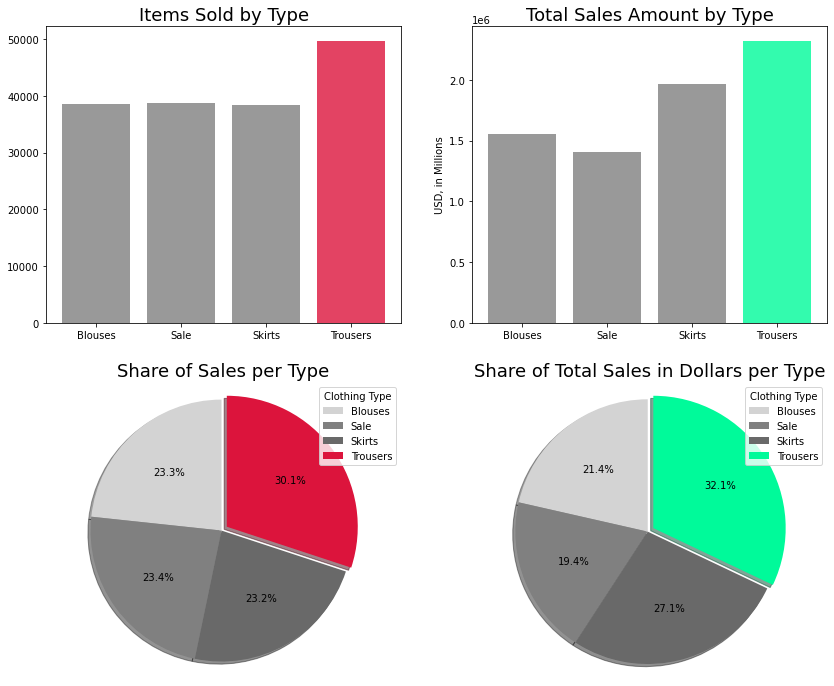

In [39]:
fig, axs = plt.subplots(nrows=2, ncols = 2, figsize=[14, 12])

axs[0,0].bar(df_type.index, df_type.Total, 
           color=['gray', 'gray', 'gray', 'crimson'], alpha=.8)
axs[0,0].set_title('Items Sold by Type', fontsize=18)
axs[0,1].bar(df_type.index, df_type.Value,
           color=['gray', 'gray', 'gray', 'mediumspringgreen'], alpha=.8)
axs[0,1].set_title('Total Sales Amount by Type', fontsize=18)
axs[0,1].set_ylabel('USD, in Millions')
axs[1,0].pie(df_type.Total, explode=(0, 0, 0, 0.05), autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=['lightgray', 'gray', 'dimgray', 'crimson'])
axs[1,0].axis('equal')
axs[1,0].set_title("Share of Sales per Type", fontsize=18)
axs[1,0].legend(df_type.index, title="Clothing Type", loc="upper right")
axs[1,1].pie(df_type.Value, explode=(0, 0, 0, 0.05), autopct='%1.1f%%',
        shadow=True, startangle=90, 
        colors=['lightgray', 'gray', 'dimgray', 'mediumspringgreen'])
axs[1,1].axis('equal')
axs[1,1].set_title("Share of Total Sales in Dollars per Type", fontsize=18)
axs[1,1].legend(df_type.index, title="Clothing Type", loc="upper right")

plt.show()

In [40]:
csdf.corr()

,Day,Price,Page
Day,1.000000,-0.002818,0.011125
Price,-0.002818,1.000000,-0.150455
Page,0.011125,-0.150455,1.000000


In [41]:
page_count=csdf.Page.value_counts()
df_grp_page_avg=csdf[['Price','Page']].groupby('Page').mean()
df_grp_page_sum=csdf[['Price','Page']].groupby('Page').sum()
df_page=df_grp_page_sum
df_page['Average']=df_grp_page_avg
df_page['Pages']=page_count

df_page

,Price,Average,Pages
Page,,,
1,4182338,44.753863,93452
2,1881226,45.842191,41037
3,711719,36.874722,19301
4,355736,40.146259,8861
5,117157,41.500886,2823


### AVERAGE PRICE OF ITEMS PER PAGE

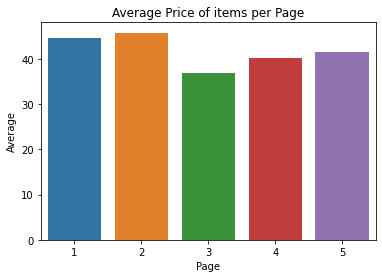

In [42]:
sns.barplot(x=df_page.index,y='Average',data=df_page)
plt.title('Average Price of items per Page')
plt.show()

### TOTAL DOLLARS WORTH OF ITEMS SOLD PER PAGE

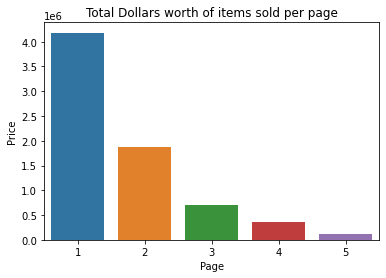

In [43]:
sns.barplot(x=df_page.index,y='Price',data=df_page)
plt.title('Total Dollars worth of items sold per page')
plt.show()

### NUMBER OF ITEMS SOLD PER PAGE

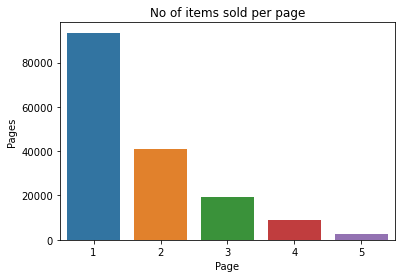

In [44]:
sns.barplot(x=df_page.index,y='Pages',data=df_page)
plt.title('No of items sold per page')
plt.show()

Interestingly, pages 5 is the median page in terms of the average price of an item, with pages 1 and 2 having a higher average price per item, and pages 3 and 4 having a lower average price per item. Oddly, page 2, rather than page 1, has the highest average price per item, whereas page 3 has the lowest average price per item. Was this intentional?

Is this meant to incentivize shoppers to buy on page 1, because page 2 is a little more expensive?
Should they jump on the bargains of page 3, before the prices go back up or they lose interest?
Or, perhaps product placement is a little more arbitrary.

The revenue generated by page and the total number of sales by page seem to have a similar distribution - let's look a little closer...

### COMPOSITIONS OF SALES AND PRICE PER PAGE

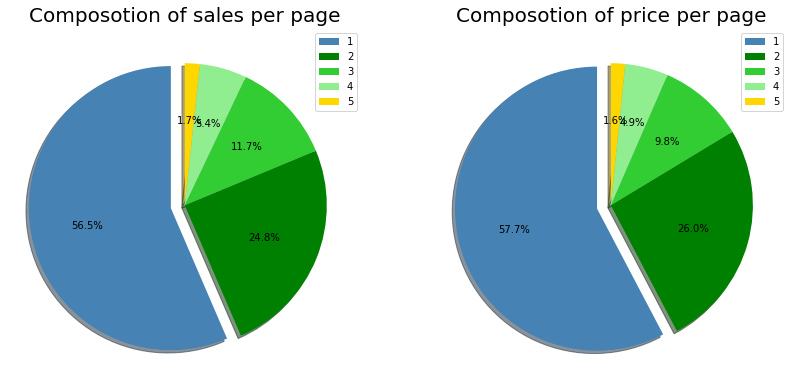

In [45]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=[14,7])
ax[0].pie(df_page.Pages, explode=(0.1, 0, 0, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90, 
        colors=['steelblue','green','limegreen','lightgreen', 'gold'])
ax[0].legend(df_page.index)
ax[0].set_title('Composotion of sales per page',fontsize=20)
ax[1].pie(df_page.Price, explode=(0.1, 0, 0, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90, 
        colors=['steelblue','green','limegreen','lightgreen', 'gold'])
ax[1].legend(df_page.index)
ax[1].set_title('Composotion of price per page',fontsize=20)
plt.show()

Both the revenue and sales generated per page skew heavily towards page 1, with well over half of all sales coming from the first page, and over 80% of each coming from pages 1 and 2. Two factors that may contribute to this are:

Customers see an item they like, and decide to purchase it rather than continue looking.
The more popular an item is, the closer it moves to page 1, in order to maximize sales.

## PCA

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_pca=df.drop(['year','page 2 (clothing model)','price_cat','price'],axis=1)
scaler.fit(df_pca)

StandardScaler()

In [47]:
df_pca.head()

,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price 2,page
0,4,1,1,29,1,1,1,5,1,2,1
1,4,1,2,29,1,1,1,6,1,2,1
2,4,1,3,29,1,2,10,2,1,1,1
3,4,1,4,29,1,2,6,6,2,2,1
4,4,1,5,29,1,2,4,3,2,1,1


### STANDARD SCALER

In [48]:
scaled_df=scaler.transform(df_pca)
scaled_df

array([[-1.19405142, -1.53159929, -0.65419449, ..., -0.59285845,
         1.02395212, -0.72288203],
       [-1.19405142, -1.53159929, -0.58000155, ..., -0.59285845,
         1.02395212, -0.72288203],
       [-1.19405142, -1.53159929, -0.50580861, ..., -0.59285845,
        -0.97660816, -0.72288203],
       ...,
       [ 1.81764291, -0.17264935, -0.65419449, ..., -0.59285845,
         1.02395212, -0.72288203],
       [ 1.81764291, -0.17264935, -0.58000155, ..., -0.59285845,
        -0.97660816, -0.72288203],
       [ 1.81764291, -0.17264935, -0.50580861, ...,  1.68674326,
        -0.97660816, -0.72288203]])

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [49]:
from sklearn.decomposition import PCA


### SELECT THE VALUE OF COMPONENTS

Text(0, 0.5, 'cumulative explained variance')

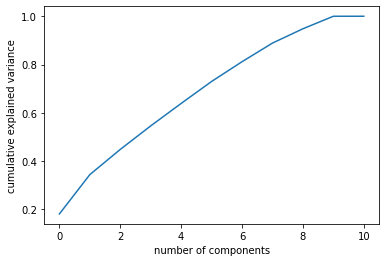

In [50]:
pca = PCA().fit(scaled_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [51]:
pca=PCA(n_components=2)


In [52]:
pca.fit(scaled_df)
x_pca=pca.transform(scaled_df)
y=df['price_cat'].values

In [53]:
y=np.array([int(i) for i in y])
y

array([0, 1, 1, ..., 1, 1, 1])

In [54]:
scaled_df.shape

(165474, 11)

In [55]:
x_pca.shape

(165474, 2)

In [56]:
pca.components_

array([[ 0.68453976,  0.06128772,  0.06977843,  0.10797125,  0.69179984,
         0.11139018,  0.01887314, -0.02885217,  0.07271063, -0.0308758 ,
         0.11268861],
       [-0.13345553, -0.01236087,  0.27977991,  0.08199719, -0.13493413,
         0.52997841,  0.39742891,  0.00378359,  0.37242301, -0.0743149 ,
         0.54384419]])

In [57]:
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'price 2', 'page',
       'price_cat'],
      dtype='object')

In [58]:
df_compo=pd.DataFrame(pca.components_,columns=['month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'colour',
       'location', 'model photography', 'price 2', 'page'])

In [59]:
df_compo.head()

,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price 2,page
0,0.684540,0.061288,0.069778,0.107971,0.691800,0.111390,0.018873,-0.028852,0.072711,-0.030876,0.112689
1,-0.133456,-0.012361,0.279780,0.081997,-0.134934,0.529978,0.397429,0.003784,0.372423,-0.074315,0.543844


<AxesSubplot:>

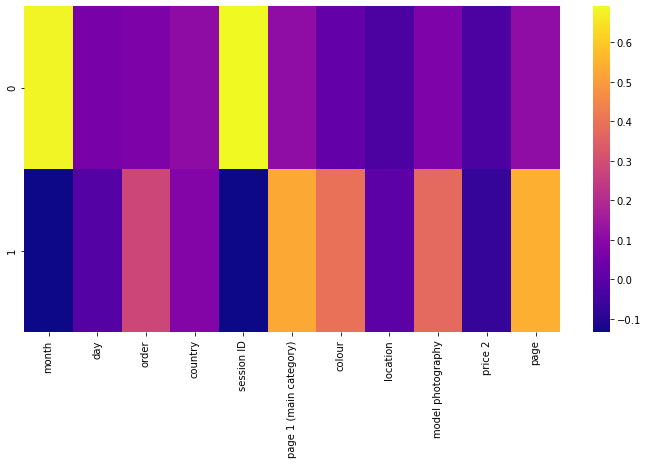

In [60]:
plt.figure(figsize=(12,6))
sns.heatmap(df_compo,cmap='plasma')

we cannot use pca to differentite between classes.

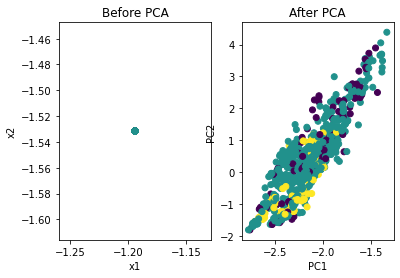

In [63]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(scaled_df[:1000,0], scaled_df[:1000,1], c=y[0:1000])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(x_pca[:1000,0], x_pca[:1000,1], c=y[0:1000])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

### K-MEANS CLUSTERING

In [64]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
scaleddf=pd.DataFrame(scaled_df)
scaleddf=scaleddf.rename({0:'month', 1:'day', 2:'order',3: 'country', 4:'session ID',
       5:'page1', 6:'colour', 7:'location',8:'model photography',
       9:'price', 10:'price2', 11:'page'},axis=1)


In [65]:
scaleddf.head()

,month,day,order,country,session ID,page1,colour,location,model photography,price,price2
0,-1.194051,-1.531599,-0.654194,0.28632,-1.720424,-1.224067,-1.234220,1.016695,-0.592858,1.023952,-0.722882
1,-1.194051,-1.531599,-0.580002,0.28632,-1.720424,-1.224067,-1.234220,1.600398,-0.592858,1.023952,-0.722882
2,-1.194051,-1.531599,-0.505809,0.28632,-1.720424,-0.350259,0.890630,-0.734414,-0.592858,-0.976608,-0.722882
3,-1.194051,-1.531599,-0.431616,0.28632,-1.720424,-0.350259,-0.053748,1.600398,1.686743,1.023952,-0.722882
4,-1.194051,-1.531599,-0.357423,0.28632,-1.720424,-0.350259,-0.525937,-0.150711,1.686743,-0.976608,-0.722882


In [66]:
# # x=scaleddf.drop('price',axis=1)
# x=scaleddf[['page1','page']]
# # x=np.array(x)
# # x.reshape(-1,1)
# y=scaleddf['price']

In [67]:
x = scaleddf.iloc[:, [9, 10]].values  
# y=scaleddf['price']

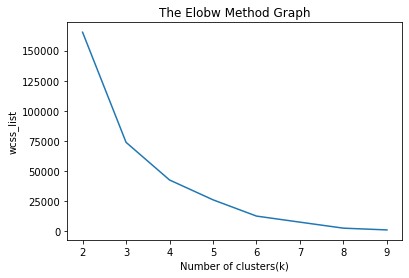

In [68]:
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(2, 10):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(2, 10), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [69]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_kmeans= kmeans.fit_predict(x)  

In [70]:
x, y_kmeans = make_blobs(n_samples=600, centers=4, cluster_std=0.60, random_state=0)

The data has several important findings:

Sales peak in April, and decline slightly in following months; the data for August is incomplete, but the decline is present with and without the August data included.

Overall, sales peak at the beginning of the month, and decline slightly over the course of the month. Once incomplete data and possible confounders are adjusted for, the sales trend seems to be more stable over the course of a month.

Skirts have the highest average price of all goods, but trousers sell the highest number of units and generate the most dollars in sales by a significant margin. Sales items bring in the least money, but generate more sales than either blouses or skirts.

Pages one and two have the highest priced items, and account for over 80% of all sales and dollars. Page 5 accounts for the fewest sales, but it is unknown if it has as many items shown as pages 1-4. Page 3 has the least expensive items of all pages.

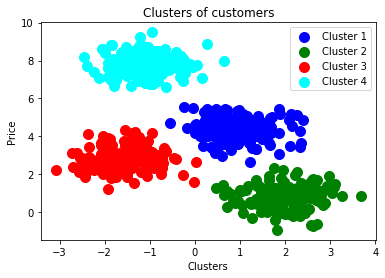

In [71]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_kmeans== 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.title('Clusters of customers')  
plt.xlabel('Clusters')  
plt.ylabel('Price')  
plt.legend()  
plt.show()  